# Homework week 4 - Paolo Zinesi

### Outline:
1. Numerical validation of circular law for uncorrelated interactions
2. Numerical validation of circular law for mutualistic interactions
3. Analysis of a food web

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as la

# network utilities
import networkx as nx

## Circular law for uncorrelated interactions

Consider an ensemble of $S \times S$ random matrices with:
* Nondiagonal entries drawn with probability $C$ from a normal distribution $\mathcal{N}(0,\sigma^2)$.
* Nondiagonal entries set to zero with probability $1-C$.
* Diagonal entries set to $-d\, (d>0)$.

The nondiagonal terms are uncorrelated. The parameter $C$ fixes the probability of interaction between two species. The circular law states that the eigenvalues of this ensemble of random matrices are **uniformly** distributed in the disk 
$$ \{z \in \mathbb{C} : |z+d|^2 \leq S\, C\, \sigma^2 \} $$
in the complex plane. We simulate different realizations of those random matrices and plot the corresponding eigenvalues to numerically validate the circular law when random matrix entries (i.e., species-species interactions) are uncorrelated. The parameters are chosen to be equal to the [original paper](https://www.nature.com/articles/nature10832).

In [26]:
# number of species
S_num = 250

# connectance
prob_C = 0.25

# carrying capacity (intra-species competition)
d_ = 1.0

# normal distribution of random entries
mu = 0.0
sigma = 1.0

# expected limiting distribution
theta0 = np.linspace(0, 2*np.pi, 1000)
circle_x = sigma * np.sqrt(S_num*prob_C) * np.cos(theta0) - d_
circle_y = sigma * np.sqrt(S_num*prob_C) * np.sin(theta0)

### Solution of the eigenvalue problem

In [27]:
eigenvals = np.array([], dtype=np.complex128)
for i in range(100):
    # fill with random numbers and set elements on diagonal
    M = np.random.normal(loc=mu, scale=sigma, size=(S_num,S_num))
    np.fill_diagonal(M, -d_)

    # choose which entries are connected
    connect_mask = np.random.choice(np.array([True, False]), size=S_num*(S_num-1), p=[prob_C, 1-prob_C])
    connect_mask = np.insert(connect_mask, range(0,S_num*(S_num-1)+1,S_num), True).reshape(S_num,S_num)

    # set to zero non-connected entries
    M[~connect_mask] = 0

    # compute eigenvalues
    eigenvals = np.concatenate((eigenvals,la.eigvals(M)), axis=None, dtype=np.complex128)

### Plots of eigenvalues distribution

Text(0, 0.5, 'Im($\\lambda$)')

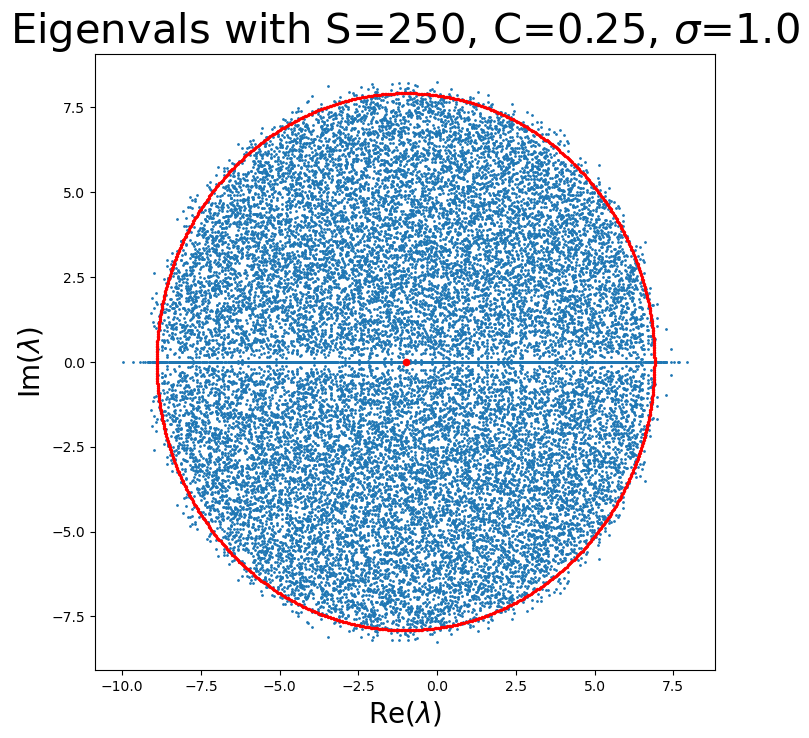

In [28]:
# plot eigenvalues to validate circular law
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.scatter(x=np.real(eigenvals), y=np.imag(eigenvals), s=1)
ax.scatter(x=circle_x, y=circle_y, s=2, c='r')
ax.scatter(x=[-d_], y=[0], s=20, c='r')
ax.set_title(f"Eigenvals with S={S_num}, C={prob_C}, $\sigma$={sigma}", fontsize=30)
ax.set_xlabel("Re($\lambda$)", fontsize=20)
ax.set_ylabel("Im($\lambda$)", fontsize=20)

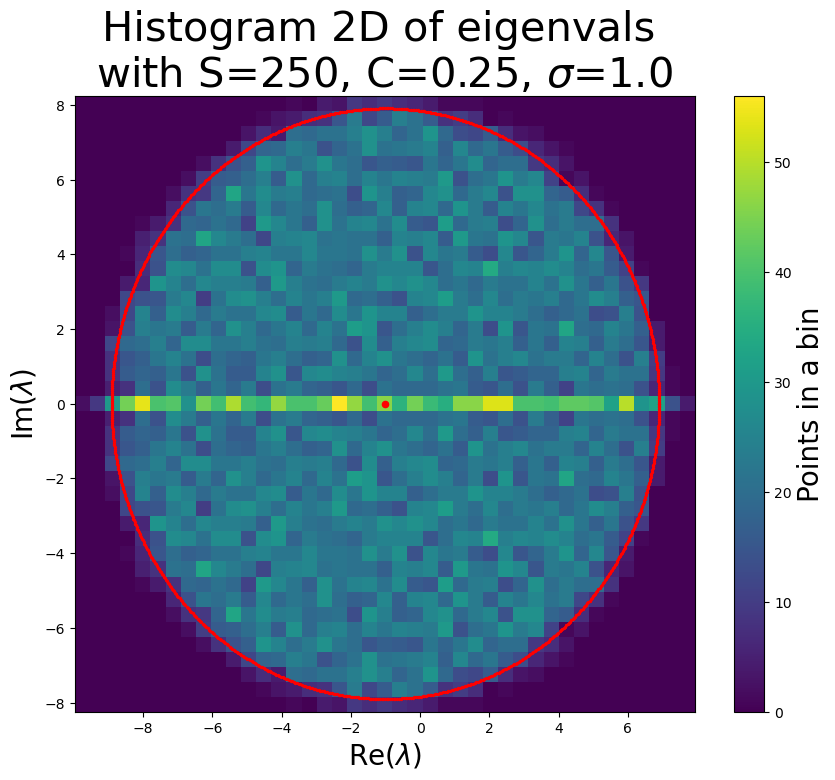

In [29]:
# plot 2D hist to show density of points
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

_, _, _, im = ax.hist2d(x=np.real(eigenvals), y=np.imag(eigenvals), bins=41)
ax.scatter(x=circle_x, y=circle_y, s=2, c='r')
ax.scatter(x=[-d_], y=[0], s=20, c='r')
ax.set_title(f"Histogram 2D of eigenvals \nwith S={S_num}, C={prob_C}, $\sigma$={sigma}", fontsize=30)
ax.set_xlabel("Re($\lambda$)", fontsize=20)
ax.set_ylabel("Im($\lambda$)", fontsize=20)
fig.colorbar(im).set_label("Points in a bin", fontsize=20)

## Elliptic law for mutualistic interactions

Consider an ensemble of $S \times S$ random matrices with:
* Nondiagonal entries chosen with probability $C$ as $(\alpha_{ij},\alpha_{ji}) = (|x_1|,|x_2|)$, with $x_1,x_2 \sim \mathcal{N}(0,\sigma^2)$.
* Nondiagonal entries set to zero with probability $1-C$.
* Diagonal entries set to $-d\, (d>0)$.

In this case, the nondiagonal terms are correlated, since they are contemporarely null or not null according to $C$, with the parameter $C$ fixing again the probability of interaction between two species. The elliptical law states that the eigenvalues of these random matrices are uniformly distributed in the region

$$ \left\{ z \in \mathbb{C} :  z+d+C\, E = (1+\rho)\, r \cos{\theta} + i (1-\rho)\, r \sin{\theta}, \text{with } 0 \leq r \leq \sqrt{S\, V} \right\}, $$

which is a generalization of the circular law when $E = \mathbb{E}[x] \neq 0$, $\rho = \dfrac{\text{Cov}(\alpha_{ij},\alpha_{ji})}{\sqrt{\text{Var}(\alpha_{ij})\, \text{Var}(\alpha_{ji})}} \neq 0$, and $V = \text{Var}(\alpha_{ij}) = \text{Var}(\alpha_{ji})$.

Analytical calculations show that the above parameters can be expressed in terms of the simulation parameters $\{ C, S, \sigma, d \}$ as
* $E = \mathbb{E}[|x|] = \sqrt{\frac{2}{\pi}} \, \sigma$,
* $V = C\, \sigma^2 -E^2 = C \, \sigma^2 \left( 1-\frac{2C}{\pi} \right)$,
* $\text{Cov}(\alpha_{ij},\alpha_{ji}) = \left( 1 - C\right)\, C\, E^2$,
* $\rho = \frac{1-C}{\pi/2-C} > 0$.

With respect to the $E=0$ case, a particular eigenvalue $\lambda_1 = -d + (S-1)\, C\, E$ arises when considering entries with non-null mean $E$. This eigenvalue increases when the size $S$ of the system increases, impacting negatively on the stability of the system.
 
We simulate different realizations of those random matrices and plot the corresponding eigenvalues to numerically validate the elliptical law in the mutualistic case. Moreover, the value of the maximum eigenvalue is studied as a function of $S$. The parameters are chosen to be equal to the ones in the [supplementary notes](https://static-content.springer.com/esm/art%3A10.1038%2Fnature10832/MediaObjects/41586_2012_BFnature10832_MOESM24_ESM.pdf) of the original paper.

In [30]:
# number of species
S_num = 250

# connectance
prob_C = 0.35

# carrying capacity (intra-species competition)
d_ = 0

# normal distribution of POSITIVE random entries
mu = 0.0
sigma = 0.05
E_absx = np.sqrt(2.0/np.pi)*sigma
var = prob_C*(sigma**2) - (prob_C*E_absx)**2
rho = (1-prob_C)/(0.5*np.pi - prob_C)

# expected limiting distribution
theta0 = np.linspace(0, 2*np.pi, 1000)
x_center = - d_ - prob_C*E_absx
ellipse_x = (1+rho) * np.sqrt(S_num*var) * np.cos(theta0) + x_center
ellipse_y = (1-rho) * np.sqrt(S_num*var) * np.sin(theta0)

# theoretical expectation of outlier eigenvalue
larger_lambda = -d_ + (S_num-1)*prob_C*E_absx

### Solution of the eigenvalue problem

In [31]:
mutual_eigenvals = np.array([])

for i in range(100):

    # choose which entries are connected, set to zero non-connected entries
    # a lower-triangular matrix is obtained
    M = np.tri(S_num,k=-1)
    connect_mask = np.random.choice(np.array([True, False]), size=(S_num,S_num), p=[prob_C, 1-prob_C])
    M[~connect_mask] = 0

    # transpose lower-triangular matrix to have pairs of mutually connected species
    M = M + M.T

    # fill positive normal entries where diagram is connected
    M = np.abs(M * np.random.normal(loc=mu, scale=sigma, size=(S_num,S_num)))

    # set elements on diagonal
    np.fill_diagonal(M, -d_)
    
    # compute eigenvalues
    eigenval = la.eigvals(M)
    mutual_eigenvals = np.concatenate((mutual_eigenvals, eigenval), axis=None)

### Plots of eigenvalues distribution

Text(0, 0.5, 'Im($\\lambda$)')

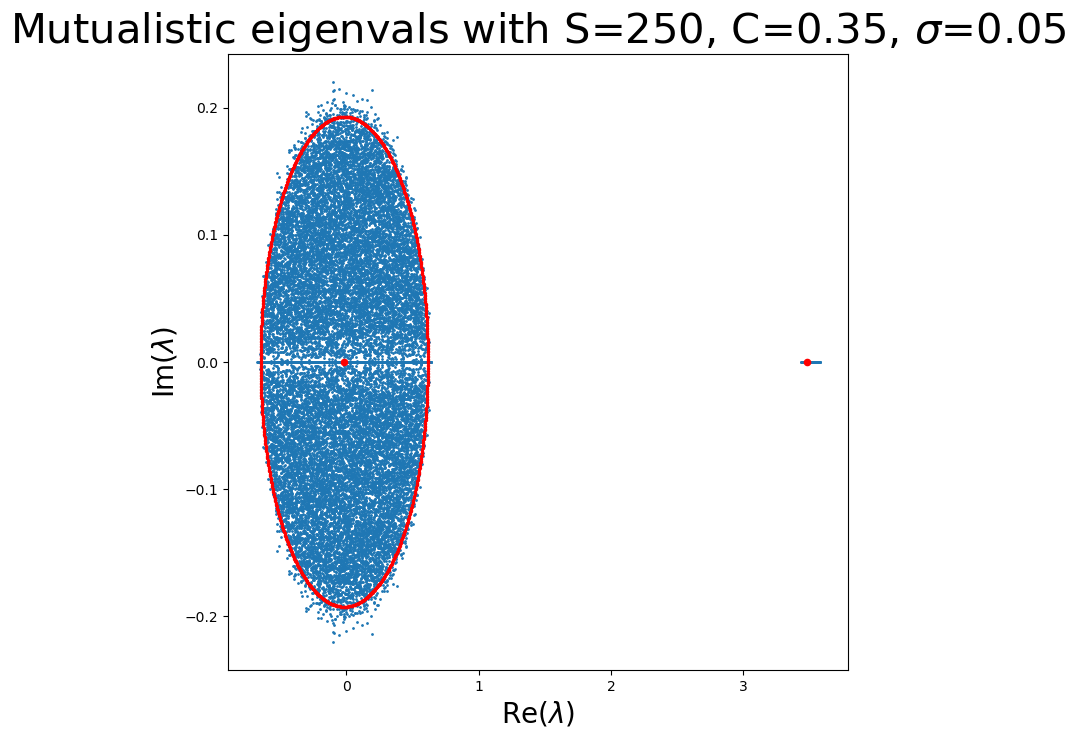

In [32]:
# plot eigenvalues to validate elliptical law
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.scatter(x=np.real(mutual_eigenvals), y=np.imag(mutual_eigenvals), s=1)
ax.scatter(x=ellipse_x, y=ellipse_y, s=2, c='r')
ax.scatter(x=[x_center,larger_lambda], y=[0,0], s=20, c='r')
ax.set_title(f"Mutualistic eigenvals with S={S_num}, C={prob_C}, $\sigma$={sigma}", fontsize=30)
ax.set_xlabel("Re($\lambda$)", fontsize=20)
ax.set_ylabel("Im($\lambda$)", fontsize=20)

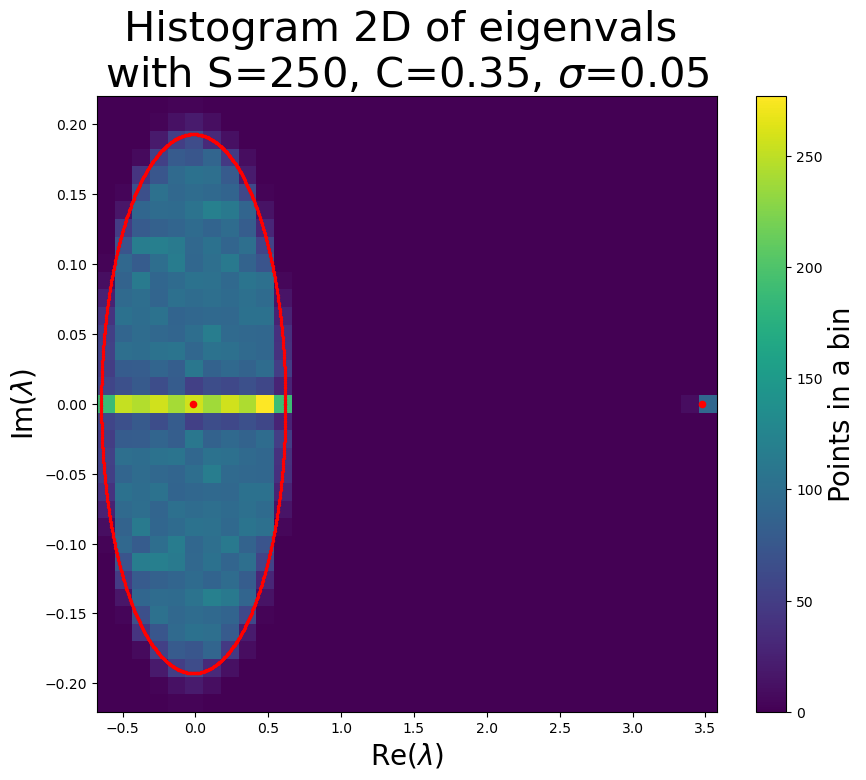

In [33]:
# plot 2D hist to show density of points
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

_, _, _, im = ax.hist2d(x=np.real(mutual_eigenvals), y=np.imag(mutual_eigenvals), bins=35)
ax.scatter(x=ellipse_x, y=ellipse_y, s=2, c='r')
ax.scatter(x=[x_center, larger_lambda], y=[0,0], s=20, c='r')
ax.set_title(f"Histogram 2D of eigenvals \nwith S={S_num}, C={prob_C}, $\sigma$={sigma}", fontsize=30)
ax.set_xlabel("Re($\lambda$)", fontsize=20)
ax.set_ylabel("Im($\lambda$)", fontsize=20)
fig.colorbar(im).set_label("Points in a bin", fontsize=20)

### Scaling analysis of larger eigenvalue

In [34]:
maxreal_eigenvals_df = pd.DataFrame({"S":[], "lambda_max":[]})

# different matrix sizes
for S_sim in range(20,110,10):

    # different realizations with the same dimension
    for i in range(100):
        # choose which entries are connected, set to zero non-connected entries
        # a lower-triangular matrix is obtained
        M = np.tri(S_sim,k=-1)
        connect_mask = np.random.choice(np.array([True, False]), size=(S_sim,S_sim), p=[prob_C, 1-prob_C])
        M[~connect_mask] = 0

        # transpose lower-triangular matrix to have pairs of mutually connected species
        M = M + M.T

        # fill positive normal entries where diagram is connected
        M = np.abs(M * np.random.normal(loc=mu, scale=sigma, size=(S_sim,S_sim)))

        # set elements on diagonal
        np.fill_diagonal(M, -d_)
        
        # compute eigenvalues
        eigenval = la.eigvals(M)
        maxreal_eigenvals_df = pd.concat([maxreal_eigenvals_df, pd.DataFrame({"S":[S_sim], "lambda_max":[np.max(np.real(eigenval))]})], ignore_index=True)

    

In [35]:
# groupby repetitions of the same configuration
maxreal_eigenvals_mean_df = maxreal_eigenvals_df.groupby("S").agg(["mean","std"])
maxreal_eigenvals_mean_df.columns = ['_'.join(col) for col in maxreal_eigenvals_mean_df.columns.to_flat_index().values]
maxreal_eigenvals_mean_df.reset_index(inplace=True)

# residuals
maxreal_eigenvals_mean_df['lambda_expected'] = np.max([-d_ + (maxreal_eigenvals_mean_df['S']-1)*prob_C*E_absx,
                                                      (1+rho) * np.sqrt(maxreal_eigenvals_mean_df['S']*var) - d_ - prob_C*E_absx], axis=0)
maxreal_eigenvals_mean_df['res'] = maxreal_eigenvals_mean_df['lambda_max_mean'] - maxreal_eigenvals_mean_df['lambda_expected']

maxreal_eigenvals_mean_df

,S,lambda_max_mean,lambda_max_std,lambda_expected,res
0,20.0,0.285636,0.033402,0.265297,0.020339
1,30.0,0.425968,0.032295,0.404926,0.021042
2,40.0,0.570353,0.031127,0.544556,0.025797
3,50.0,0.702025,0.033668,0.684186,0.017839
4,60.0,0.849261,0.031431,0.823816,0.025445
5,70.0,0.991603,0.034701,0.963446,0.028157
6,80.0,1.128313,0.030424,1.103075,0.025238
7,90.0,1.267732,0.031687,1.242705,0.025027
8,100.0,1.412655,0.033245,1.382335,0.030320


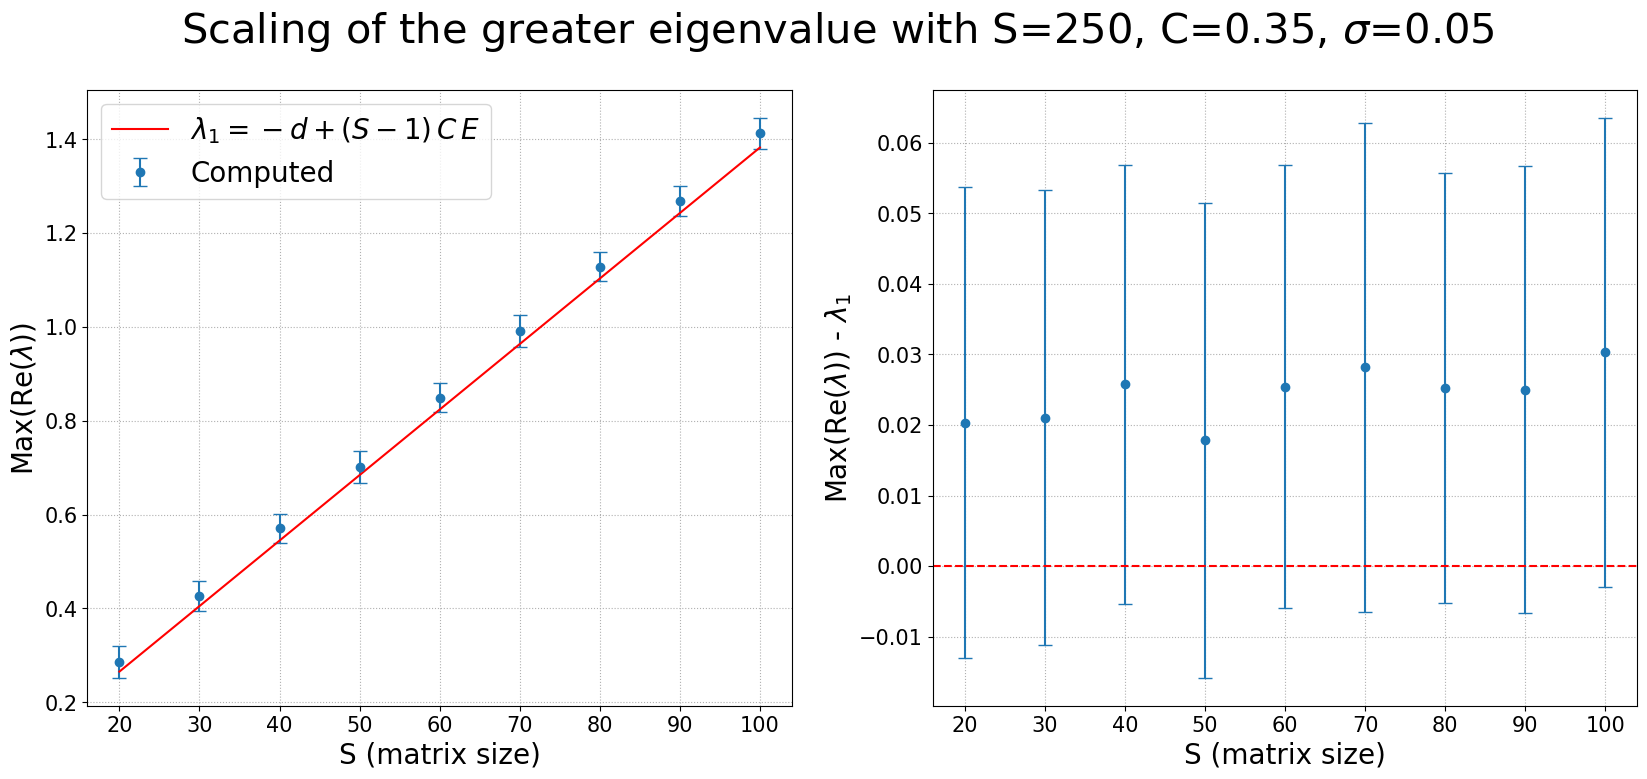

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(f"Scaling of the greater eigenvalue with S={S_num}, C={prob_C}, $\sigma$={sigma}", fontsize=30)

# calculated scaling
ax[0].errorbar(x='S', y='lambda_max_mean', yerr='lambda_max_std', data=maxreal_eigenvals_mean_df,
               fmt="o", label="Computed", capsize=5)

# expected scaling
ax[0].plot(maxreal_eigenvals_mean_df['S'], maxreal_eigenvals_mean_df['lambda_expected'], c='r', label=r'$\lambda_1 = -d + (S-1)\, C\, E$')

ax[0].set_xlabel("S (matrix size)", fontsize=20)
ax[0].set_ylabel(r"Max(Re($\lambda$))", fontsize=20)
ax[0].tick_params(axis="both", which="major", labelsize=15)
ax[0].grid(True, which="both", linestyle=":")
ax[0].legend(fontsize=20)


# residuals
ax[1].errorbar(x='S', y='res', yerr='lambda_max_std', data=maxreal_eigenvals_mean_df,
               fmt="o", capsize=5)
ax[1].axhline(0, c='r', ls='--')


ax[1].set_ylabel(r"Max(Re($\lambda$)) - $\lambda_1$", fontsize=20)
ax[1].set_xlabel("S (matrix size)", fontsize=20)
ax[1].tick_params(axis="both", which="major", labelsize=15)
ax[1].grid(True, which="both", linestyle=":")

The larger eigenvalue $\lambda_1$ scales linearly as expected. The undesrestimation of the theoretical value of $\lambda_1$ is a phenomenon occurring when the product $S\, C$ is low (thus, also the number of non-null entries is low). In the $S\, C \rightarrow \infty$ limit, the theoretical and measured values of $\lambda_1$ tend to coincide.

## Analysis of a food web
The adjacency matrix $a_{ij}$, defined as

$$a_{ij} =\begin{cases}
    1 & \text{if $j$ predates $i$},\\
    0 & \text{if $j$ does not predate $i$},
  \end{cases}$$

describes the predation relationships (directed links of a graph) of all the species (graph nodes).

In [37]:
# import data
data_df = pd.read_excel("Food-web-Dataset-PNAS-05.xls", sheet_name="Interactionstrength_matrix")
species_codes = pd.read_excel("Food-web-Dataset-PNAS-05.xls", sheet_name="Species_codes")

# clean labels from whitespaces
data_df.columns = np.char.strip(data_df.columns.values.astype(str))
data_df['prey\predator'] = np.char.strip(data_df['prey\predator'].values.astype(str))
labels = data_df['prey\predator'].values
species_codes["Code"] = np.char.strip(species_codes["Code"].values.astype(str))

# create dataframe with labels as indexes and columns
data_df.set_index('prey\predator', inplace=True)
data_df

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
prey\predator,,,,,,,,,,,,,,,,,,,,,
D1,0,0,0,0,0.000000,0.000226,0.000006,0.000001,0.000001,0.000002,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,2.266301e-07,3.244932e-07,0.000000
A1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,4.724895e-06,1.682557e-06,0.000000
A2,0,0,0,0,0.000000,0.000000,0.000000,0.000022,0.000022,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,1.016026e-06,0.000000e+00,0.000000
A3,0,0,0,0,0.026745,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000
I1,0,0,0,0,0.000000,0.000000,0.000000,0.000685,0.000685,0.003196,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F204,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000413,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000
F205,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001256,0.0,0.000000,0.000278,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000587
F206,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001797,0.0,0.000000,0.000000,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000


In [38]:
# binarize data
data_df = (data_df>0).astype(int)
data_df

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
prey\predator,,,,,,,,,,,,,,,,,,,,,
D1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
A2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
A3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F204,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
F205,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
F206,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
# create dictionary to associate codes to species name
dict_codes = species_codes.set_index('Code').to_dict('index')
dict_codes["D1"]

{'Family': 'Detritus POM DOM', 'Species': 'Detritus POM DOM'}

#### Graph creation and metrics estimation

Important parameters of the graph are:
* Number of nodes (or species): $S$
* Network links: $L=\sum_{ij} a_{ij}$

Metrics used to analyze the food chain are:
* Number of incoming links (also called "in_degree") of node $i$: $k_i^{(in)} = \sum_{j} a_{ji}$
* Generality of specie $i$ (a normalized version of the "in_degree"): $G_i = k_i^{(in)}/(L\,S) = \sum_{j} a_{ji}/(L\,S)$
* Number of outgoing links (also called "out_degree") from node $i$: $k_i^{(out)} = \sum_{j} a_{ij}$
* Vulnerability of specie $i$ (a normalized version of the "out_degree"): $V_i = k_i^{(out)}/(L\,S) = \sum_{j} a_{ij}/(L\,S)$
* Trophic similarity (related to the common preys and predators of two species): $S_{ij} = \sum_k \left[ a_{ki} a_{kj} + a_{ik} a_{jk} \right]/S$

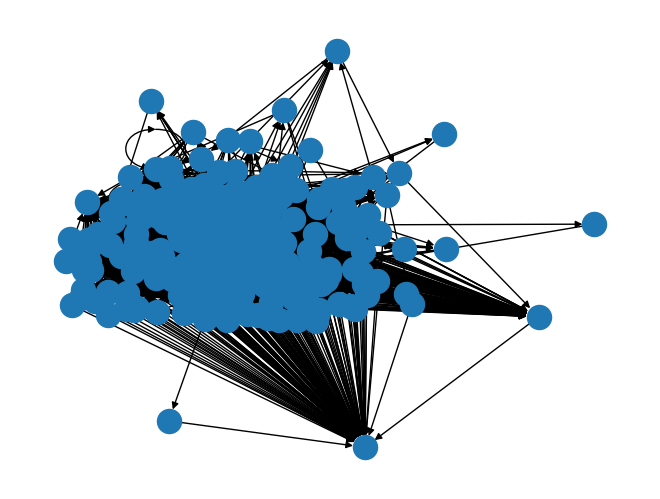

In [40]:
G = nx.from_pandas_adjacency(data_df, nx.DiGraph)
nx.draw(G)

In [41]:
# species number (S) and number of links (L)
S_ = G.number_of_nodes()
L_ = G.number_of_edges()

# in- and out-degrees
in_degrees = G.in_degree()
out_degrees = G.out_degree()

# create df to store in and out degrees
inout_df = pd.DataFrame.from_dict(dict(in_degrees), orient='index', columns=["in_degree"])
inout_df = pd.concat([inout_df, pd.DataFrame.from_dict(dict(out_degrees), orient='index', columns=["out_degree"])], axis=1)

# generality and vulnerability
inout_df['generality'] = inout_df['in_degree']/(L_*S_)
inout_df['vulnerability'] = inout_df['out_degree']/(L_*S_)

inout_df

,in_degree,out_degree,generality,vulnerability
D1,0,49,0.000000,0.000059
A1,0,70,0.000000,0.000085
A2,0,30,0.000000,0.000036
A3,0,12,0.000000,0.000015
I1,2,23,0.000002,0.000028
...,...,...,...,...
F204,26,7,0.000032,0.000008
F205,0,13,0.000000,0.000016
F206,17,4,0.000021,0.000005
F207,16,11,0.000019,0.000013


In [42]:
# trophic similarity (also called trophic overlap)
trophic_overlap = (np.matmul(data_df.values.T, data_df.values) + np.matmul(data_df.values, data_df.values.T))/S_
trophic_overlap = pd.DataFrame(trophic_overlap, columns=list(G.nodes()), index=list(G.nodes()))
trophic_overlap

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
D1,0.196787,0.116466,0.052209,0.040161,0.052209,0.132530,0.032129,0.036145,0.016064,0.024096,...,0.004016,0.004016,0.004016,0.008032,0.008032,0.004016,0.008032,0.000000,0.004016,0.008032
A1,0.116466,0.281124,0.096386,0.008032,0.032129,0.136546,0.108434,0.064257,0.052209,0.060241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000
A2,0.052209,0.096386,0.120482,0.000000,0.024096,0.068273,0.060241,0.052209,0.044177,0.040161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3,0.040161,0.008032,0.000000,0.048193,0.028112,0.048193,0.008032,0.004016,0.004016,0.004016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
I1,0.052209,0.032129,0.024096,0.028112,0.100402,0.068273,0.016064,0.016064,0.012048,0.012048,...,0.004016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004016,0.004016,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F204,0.004016,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000,0.000000,0.000000,0.000000,...,0.096386,0.024096,0.064257,0.060241,0.024096,0.132530,0.024096,0.012048,0.008032,0.060241
F205,0.008032,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000,0.000000,0.000000,0.000000,...,0.012048,0.016064,0.004016,0.012048,0.044177,0.024096,0.052209,0.016064,0.032129,0.012048
F206,0.000000,0.000000,0.000000,0.000000,0.004016,0.008032,0.004016,0.012048,0.012048,0.008032,...,0.008032,0.008032,0.004016,0.016064,0.008032,0.012048,0.016064,0.084337,0.060241,0.016064
F207,0.004016,0.004016,0.000000,0.000000,0.004016,0.004016,0.004016,0.008032,0.008032,0.008032,...,0.008032,0.004016,0.004016,0.016064,0.024096,0.008032,0.032129,0.060241,0.108434,0.020080


(array([1.5846e+04, 1.4933e+04, 1.0894e+04, 5.0320e+03, 5.1760e+03,
        4.3890e+03, 2.6880e+03, 1.2400e+03, 6.1700e+02, 3.6300e+02,
        1.9800e+02, 1.1300e+02, 8.0000e+01, 5.1000e+01, 3.7000e+01,
        3.2000e+01, 2.9000e+01, 3.4000e+01, 2.9000e+01, 1.3000e+01,
        1.4000e+01, 1.4000e+01, 1.0000e+01, 1.3000e+01, 1.7000e+01,
        6.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+01, 8.0000e+00, 1.1000e+01,
        5.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 7.0000e+00,
        8.0000e+00, 1.4000e+01, 1.8000e+01, 1.1000e+01, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

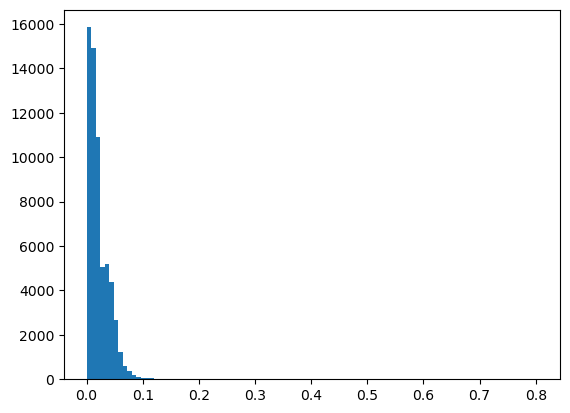

In [140]:
plt.hist(trophic_overlap.values.reshape(-1), bins=100)

### Trophic level
The trophic level is an estimator of the position of a specie in the food chain, which depends recursively on the trophic levels of the preys of that specie. All the basal species (which have "in_degree"=0 and at least one outgoing link) are assigned a trophic level $S(B)=1$. All the other species are assigned a trophic level according to the relation

$$ S(i) = 1 + \frac{1}{k_i^{(in)}} \sum_j a_{ji}\, S(j). $$

However, most of the times in a graph it is not possible to assign this value to all the nodes using the deterministic formula, because the requirement of having computed $S(j)$ for all incoming links is difficult to satisfy in general. At some point in the computation, all the nodes has at lest one undefined $S(j)$. So, an iterative procedure needs to be employed. We solved the problem by randomly initializing the values of the yet undefined $S(i)$ according to a given distribution and then repeating multiple times the computation using the definition of $S(i)$, until convergence is reached. The following plots show that the final result is **independent** on the initialization (also large initializations have been considered) and the convergence is reached in  approximately 20 iterations.


In [43]:
def trophic_level(G_, loc_shift=10.0, sigma_shift=1.0, eps_it=1.0e-6, max_it=100):
    """
    Function that takes as input a graph (G_) and the desired random initialization for recursion procedure
    and outputs the estimated trophic levels and the time evolution of the trophic levels updates.
    """

    # useful graph parameters
    inout_df = pd.DataFrame.from_dict(dict(G_.in_degree()), orient='index', columns=["in_degree"])
    inout_df = pd.concat([inout_df, pd.DataFrame.from_dict(dict(G_.out_degree()), orient='index', columns=["out_degree"])], axis=1)
    S_ = G_.number_of_nodes()
    L_ = G_.number_of_edges()

    # initialize trophic level df
    trophiclevel_df = pd.Series([np.nan]*S_, index=list(G_.nodes()))

    # set trophic level of basal species
    leaves_idx = inout_df[(inout_df['in_degree']==0) & (inout_df['out_degree']>0)].index
    trophiclevel_df[leaves_idx] = 1

    # set trophic level of unconnected species to -inf
    trophiclevel_df[inout_df[(inout_df['in_degree']==0) & (inout_df['out_degree']==0)].index] = - np.inf


    # ---------------------------------------------------
    # deterministic computation of known trophic levels
    # ---------------------------------------------------
    N_undef_old, N_undef_new = S_, S_-1

    # deterministic iterations
    while((N_undef_new < N_undef_old) and (N_undef_new > 0)):
        # get indexes of species undefined yet
        undef_idx = trophiclevel_df[np.isnan(trophiclevel_df)].index
        N_undef_old = len(undef_idx)

        for idx in undef_idx:
            # check if there is any predecessor with undefined trophic level
            any_undef = np.any(np.isnan(trophiclevel_df[G_.predecessors(idx)]))
                    
            # if all predecessor nodes have defined trophic level, update the trophic level
            if any_undef==False:
                trophiclevel_df[idx] = 1 + (1.0/inout_df.loc[idx,'in_degree'])*np.sum(trophiclevel_df[G_.predecessors(idx)])
        
        N_undef_new = len(trophiclevel_df[np.isnan(trophiclevel_df)])



    # ---------------------------------------------------
    # iterative computation of trophic levels
    # ---------------------------------------------------

    # nodes on which iterating the algorithm
    iter_idx = trophiclevel_df[np.isnan(trophiclevel_df)].index

    # assign a random value to all the unknown levels
    trophiclevel_df[iter_idx] = np.random.normal(loc=loc_shift+np.max(trophiclevel_df[~np.isnan(trophiclevel_df)]), scale=sigma_shift, size=len(iter_idx))

    delta_impr = eps_it+1
    num_it = 0
    delta_evol = []

    # iterative computation
    while(delta_impr > eps_it and num_it<max_it):
        trophiclevel_df_old = trophiclevel_df.copy()
        num_it += 1

        # compute iteratively
        for it in iter_idx:
            trophiclevel_df[it] = 1 + (1.0/inout_df.loc[it,'in_degree'])*np.sum(trophiclevel_df_old[G_.predecessors(it)])

        # compute improvement
        delta_impr = la.norm((trophiclevel_df - trophiclevel_df_old).values)
        delta_evol.append(delta_impr)
    
    return trophiclevel_df, delta_evol

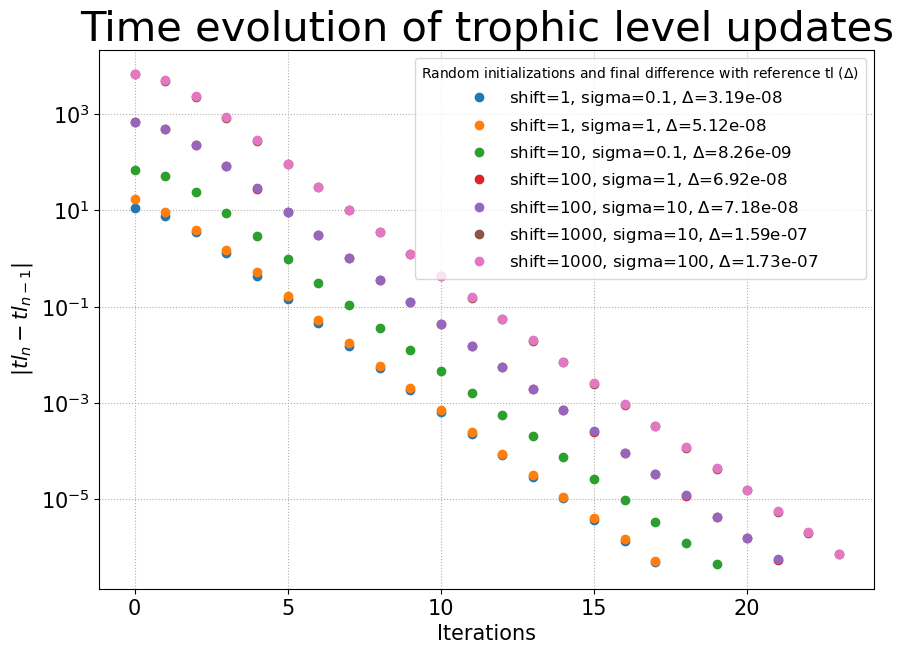

In [44]:
# reference results (for comparison)
ref_trophiclevel, ref_delta_evol = trophic_level(G, loc_shift=10.0, sigma_shift=1.0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot all the desider plots
for mu,s in zip([1,1,10,100,100,1000,1000],[0.1,1,0.1,1,10,10,100]):
    tl, delta_ev = trophic_level(G, loc_shift=mu, sigma_shift=s)
    ax.plot(delta_ev, "o", label=f"shift={mu}, sigma={s}, $\Delta$={la.norm(ref_trophiclevel.values-tl.values):.2e}")


ax.set_title("Time evolution of trophic level updates", fontsize=30)
ax.set_xlabel("Iterations", fontsize=15)
ax.set_ylabel(r"$|{tl}_n - {tl}_{n-1}|$", fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.grid(True, which="both", linestyle=":")
ax.set_yscale("log")
ax.legend(fontsize=12, title="Random initializations and final difference with reference tl ($\Delta$)")

Text(0, 0.5, 'Counts')

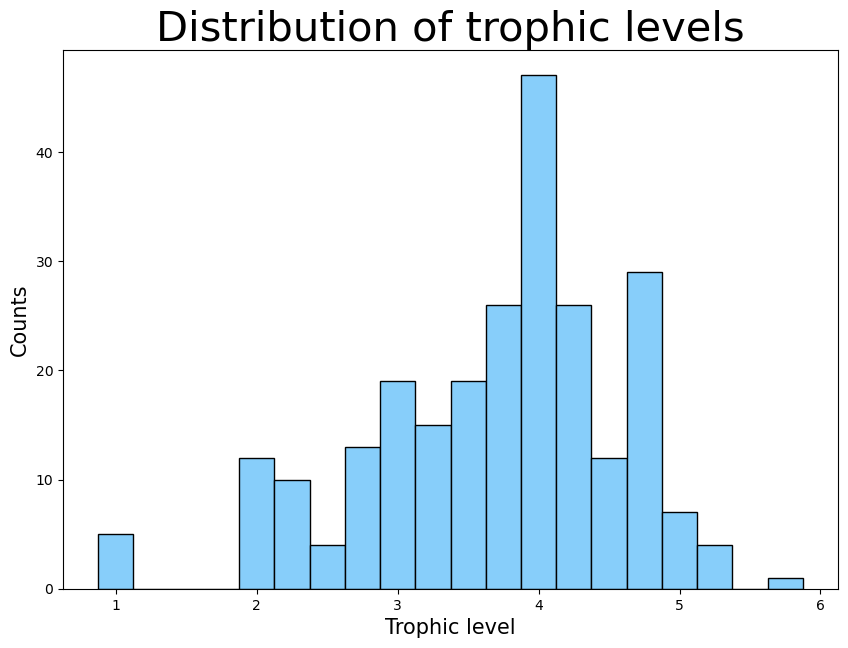

In [45]:
# evaluate and plottrophic level
trophiclevel_df, _ = trophic_level(G, loc_shift=10.0, sigma_shift=1.0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.hist(trophiclevel_df, color="lightskyblue", edgecolor="black", bins=np.arange(1-0.125, 6.125, step=0.25))

ax.set_title("Distribution of trophic levels", fontsize=30)
ax.set_xlabel("Trophic level", fontsize=15)
ax.set_ylabel("Counts", fontsize=15)

### Trophicoherence
Trophicoherence is defined as how neatly nodes fall into distinct levels of the network. It is defined in terms of the trophic difference $X_{ij} = S(i) - S(j)$ as

$$ q = \sqrt{\langle X^2 \rangle - \langle X \rangle^2} = \sqrt{2} S \sqrt{\langle S(i)^2 \rangle - \langle S(i) \rangle^2}, $$
where $S$ denotes the number of species.

In [59]:
trophicoh = np.sqrt(2.0) * len(trophiclevel_df) * np.sqrt(np.mean(trophiclevel_df**2)-(np.mean(trophiclevel_df)**2))
print(f"Trophicoherence = {trophicoh:.3f}")

Trophicoherence = 312.911


### Shortest paths
* Shortes length from node $i$ to node $j$: minimum distance (if a path connecting $i$ to $j$ exists) to go from $i$ to $j$
* Chain length: length of the shortest distance between a basal specie and the specie with highest trophic level (which could be considered the top predator of the food chain)

In [47]:
leaves_idx = trophiclevel_df[trophiclevel_df==1].index
top_idx = trophiclevel_df.idxmax()

chain_length = min([nx.shortest_path_length(G, source=leaf, target=top_idx) for leaf in leaves_idx if nx.has_path(G, source=leaf, target=top_idx)])
print(f"Chain length = {chain_length}")

Chain length = 3


Text(0, 0.5, 'Counts')

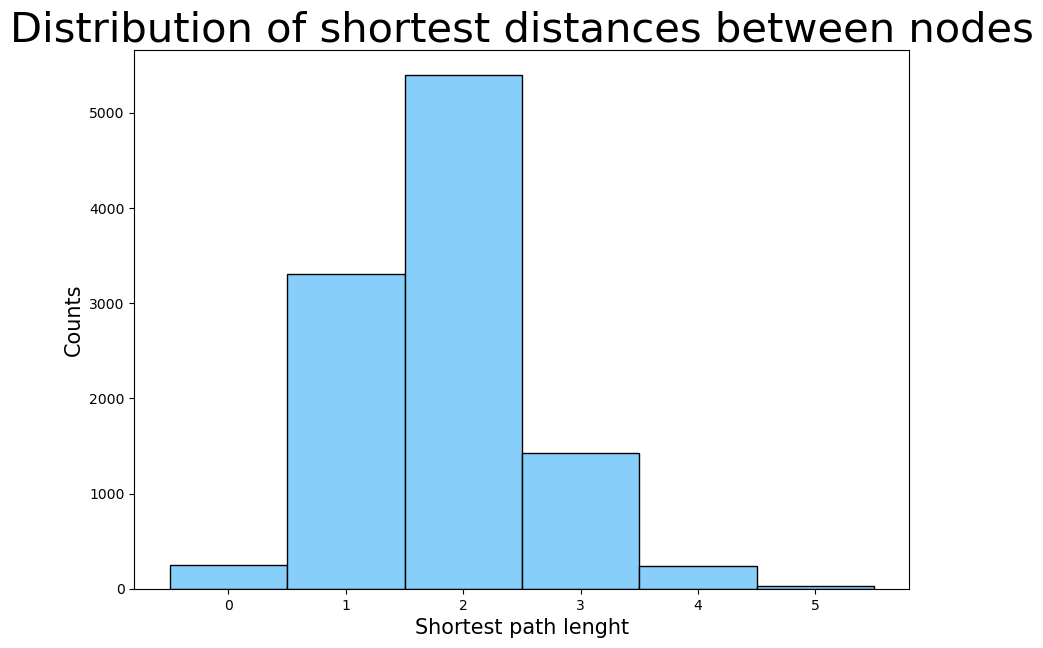

In [48]:
all_shortest_paths = pd.DataFrame.from_dict(dict(nx.all_pairs_shortest_path_length(G)), orient='index').values.flatten()
all_shortest_paths = all_shortest_paths[~np.isnan(all_shortest_paths)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.hist(all_shortest_paths, color="lightskyblue", edgecolor="black", bins=np.arange(-0.5, max(all_shortest_paths)+1.5))

ax.set_title("Distribution of shortest distances between nodes", fontsize=30)
ax.set_xlabel("Shortest path lenght", fontsize=15)
ax.set_ylabel("Counts", fontsize=15)